<a href="https://colab.research.google.com/github/tar697/FBI-time-series-forecasting/blob/main/Glassdoor_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Name - Glassdoor Project




#Project Summary -
This project uses a real-world dataset to analyze and predict salaries based on various job-related attributes.

1. Explore how factors like job title, location, company size, industry, and rating impact salary.

2. Build an interactive dashboard for salary trend insights.

3. Train a machine learning model to predict salaries based on job features.

# GitHub Link -

#Problem Statement


# Import libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import re
import plotly.express as px



**Load** **data**



In [ ]:
df = pd.read_csv("glassdoor_jobs.csv")
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


Check number of unique job titles



In [ ]:
unique_job_titles = df['Job Title'].nunique()
print(f"Total unique job titles: {unique_job_titles}")

Total unique job titles: 328


 Grouping job titles helps simplify analysis

**Problem solution1: Salary variation by job variation**

In [ ]:
# Extract average salary
def parse_salary(salary_str):
    match = re.findall(r'\$([\d]+)K', str(salary_str))
    if len(match) == 2:
        low, high = int(match[0]), int(match[1])
        return (low + high) / 2
    return None

df['Avg Salary (K)'] = df['Salary Estimate'].apply(parse_salary)
df['Job Title'] = df['Job Title'].str.lower()

# Group job titles
def group_title(title):
    if 'data scientist' in title:
        return 'Data Scientist'
    elif 'data analyst' in title:
        return 'Data Analyst'
    elif 'software engineer' in title:
        return 'Software Engineer'
    elif 'web developer' in title:
        return 'Web Developer'
    elif 'machine learning' in title:
        return 'ML Engineer'
    elif 'devops' in title:
        return 'DevOps Engineer'
    elif 'product manager' in title:
        return 'Product Manager'
    elif 'project manager' in title:
        return 'Project Manager'
    elif 'business analyst' in title:
        return 'Business Analyst'
    elif 'analyst' in title:
        return 'Analyst'
    elif 'manager' in title:
        return 'Manager'
    elif 'director' in title:
        return 'Director'
    elif 'intern' in title:
        return 'Intern'
    else:
        return 'Other'

df['Job Category'] = df['Job Title'].apply(group_title)
print(df['Job Category'].value_counts())





Job Category
Other                383
Data Scientist       358
Data Analyst         107
Manager               30
ML Engineer           26
Analyst               18
Director              16
Software Engineer      5
Intern                 4
DevOps Engineer        4
Project Manager        4
Product Manager        1
Name: count, dtype: int64


Removes rows from the dataset where the column "Avg Salary" has missing (NaN) values.

In [ ]:
df_clean = df.dropna(subset=['Avg Salary (K)'])

# Calculate average salary by category
avg_salary_by_category = df_clean.groupby('Job Category')['Avg Salary (K)'].mean().reset_index()
avg_salary_by_category = avg_salary_by_category.sort_values(by='Avg Salary (K)', ascending=False)

Plot interactive bar chart


In [ ]:
fig = px.bar(
    avg_salary_by_category,
    x='Job Category',
    y='Avg Salary (K)',
    color='Job Category',
    title='Average Salary by Job Title Category',
    labels={'Avg Salary (K)': 'Average Salary (K USD)'},
    template='plotly_white'
)

fig.update_layout(xaxis_tickangle=45, showlegend=False)
fig.show()

**Problem statement 2: Impact of company size on salary level**

In [ ]:
# Group by company size and calculate average salary
avg_salary_by_size = df_clean.groupby('Size')['Avg Salary (K)'].mean().reset_index()

# Optional: Sort company sizes (if they're strings like '1 to 50 employees', '1001 to 5000 employees', etc.)
size_order = [
    '1 to 50 employees',
    '51 to 200 employees',
    '201 to 500 employees',
    '501 to 1000 employees',
    '1001 to 5000 employees',
    '5001 to 10000 employees',
    '10000+ employees'
]
avg_salary_by_size['Size'] = pd.Categorical(avg_salary_by_size['Size'], categories=size_order, ordered=True)
avg_salary_by_size = avg_salary_by_size.sort_values('Size')

# Plot interactive bar chart
fig = px.bar(
    avg_salary_by_size,
    x='Size',
    y='Avg Salary (K)',
    color='Size',
    title='Average Salary by Company Size',
    labels={'Avg Salary (K)': 'Average Salary (K USD)'},
    template='plotly_white'
)

fig.update_layout(xaxis_tickangle=45, showlegend=False)
fig.show()

**Problem statment 3: How salary differ by location?**

In [ ]:
# Optional: Clean up location names (remove trailing whitespace etc.)
df_clean['Location'] = df_clean['Location'].str.strip()

# Step 3: Group by location and compute average salary
avg_salary_by_location = df_clean.groupby('Location')['Avg Salary (K)'].mean().reset_index()

# Step 4: Sort by highest average salary
avg_salary_by_location = avg_salary_by_location.sort_values(by='Avg Salary (K)', ascending=False)

# Optional: Show top N cities/states
top_n = 20
top_locations = avg_salary_by_location.head(top_n)

# Step 5: Plot using Plotly
fig = px.bar(
    top_locations,
    x='Location',
    y='Avg Salary (K)',
    color='Location',
    title=f'Top {top_n} Locations by Average Salary',
    labels={'Avg Salary (K)': 'Average Salary (K USD)'},
    template='plotly_white'
)

fig.update_layout(xaxis_tickangle=45, showlegend=False)
fig.show()


<ipython-input-39-1444152957>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Problem statment 4: Predictive model to estimate salaries**

In [ ]:
features = ['Job Title', 'Location', 'Size', 'Industry', 'Rating', 'Type of ownership']


# Train-Test split

In [ ]:
from sklearn.model_selection import train_test_split
# Step 3: Drop rows with missing values
df_model = df[['Job Title', 'Location', 'Size', 'Type of ownership', 'Industry', 'Rating', 'Avg Salary (K)']].dropna()

# Step 4: One-hot encode categorical features
X = df_model.drop('Avg Salary (K)', axis=1)
y = df_model['Avg Salary (K)']
X_encoded = pd.get_dummies(X)

X = df_model[features]
y = df_model['Avg Salary (K)']

X_encoded = pd.get_dummies(X)  # One-hot encode
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

NameError: name 'df' is not defined

# Model trainning

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

NameError: name 'LinearRegression' is not defined

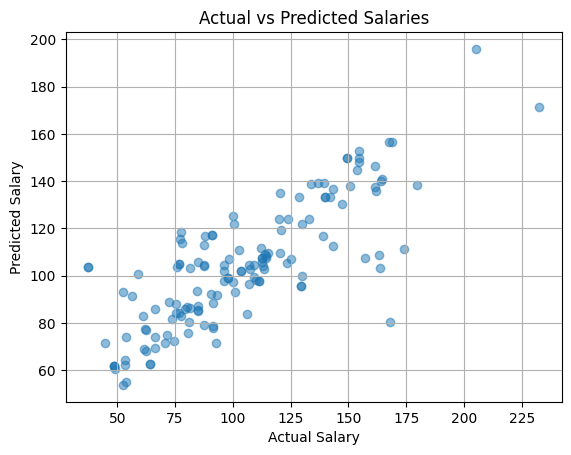

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salaries")
plt.grid(True)
plt.show()